# Regression

## Introduction
___

Regression is a type of machine learning algorithm used to **predict a continuous output variable** based on one or more input variables. It is a fundamental technique in statistics and data analysis, and it is widely used in various fields such as finance, economics, and science.

The goal of regression analysis is to **establish a relationship between the input variables** (also known as independent variables) a**nd the output variable** (also known as the dependent variable). This relationship is typically represented by a **mathematical equation that** can be used to make predictions about the output variable for new input values.

There are several types of regression algorithms, including:

1. **Simple Linear Regression:** This is the simplest form of regression, involving a single input variable and a single output variable. The relationship between the variables is assumed to be linear, meaning that the output variable changes in a constant amount for each unit change in the input variable.
   
2. **Multiple Linear Regression:** This type of regression involves **multiple input variables** and a **single output variable**. The relationship between the variables is assumed to be linear, meaning that the output variable changes in a constant amount for each unit change in the input variables.

3. **Polynomial Regression:** This type of regression involves a single input variable and a single output variable, but the relationship between the variables is assumed to be non-linear. The relationship is represented by a polynomial equation, which can be used to make predictions about the output variable for new input values.

There are more types of regression algorithms, which we will explore in the upcoming lessons.

![Summary of regressions in a sketchnote](../images/ml-regression.png)

<!-- > Sketchnote by [Tomomi Imura](https://www.twitter.com/girlie_mac) -->

In this notebook you will discover how to build regression models.

But before you do anything, make sure you have the right tools in place to start the process!

In this lesson, you will learn how to:

- Use Scikit-learn, including installation.
- Explore linear regression with a hands-on exercise.

## Installations and configurations

Make sure to follow the instructions in the [Python Installation](../python/1_Installation.ipynb) to set up your environment. Additionally, you need to install Scikit learn

1. **Install Scikit-learn**, by following [these instructions](https://scikit-learn.org/stable/install.html). Since you need to ensure that you use Python 3, it's recommended that you use a virtual environment. Note, if you are installing this library on a M1 Mac, there are special instructions on the page linked above.

   ```bash
   pip install scikit-learn
   ```  


In [3]:
! pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 856.8 kB/s eta 0:00:00:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 4.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 3.5 MB/s eta 0:00:0000:0100:01


## Excercise

In this section, you will work with a small dataset about diabetes that is built into Scikit-learn for learning purposes. 

### Problem Statement

Imagine that you wanted to test a treatment for diabetic patients. Machine Learning models might help you determine which patients would respond better to the treatment, based on combinations of variables. 

Even a very basic regression model, when visualized, might show information about variables that would help you organize your theoretical clinical trials.

#### Import libraries

For this task we will import some libraries:

- **matplotlib**. It's a useful [graphing tool](https://matplotlib.org/) and we will use it to create a line plot.
- **numpy**. [numpy](https://numpy.org/doc/stable/user/whatisnumpy.html) is a useful library for handling numeric data in Python.
- **sklearn**. This is the [Scikit-learn](https://scikit-learn.org/stable/user_guide.html) library.

In [4]:
# 1. Add imports by typing the following code:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

### Prepare data 

#### The diabetes dataset

The built-in [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) includes 442 samples of data around diabetes, with 10 feature variables, some of which include:

- age: age in years
- bmi: body mass index
- bp: average blood pressure
- s1 tc: T-Cells (a type of white blood cells)

✅ This dataset includes the concept of 'sex' as a feature variable important to research around diabetes. Many medical datasets include this type of binary classification. Think a bit about how categorizations such as this might exclude certain parts of a population from treatments.

Now, load up the X and y data.

> 🎓 Remember, this is supervised learning, and we need a named 'y' target.

In [9]:

# 1. Add some print commands to show the shape of the data matrix and its first element:

X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


    
You can see that this data has 442 items shaped in arrays of 10 elements, which means every record has 10 features or is a 10 dimensional point.

To **plot this data**, we need to reshape it. Which means we need to convert it into a 1D array.

You can reshape the data to plot it. What it means is that we are taking all the records and converting them into a single array.

We can do this by using the `reshape` method.

```python
X = X[:, 2].reshape(-1, 1)
```

✅ Think a bit about the relationship between the data and the regression target. Linear regression predicts relationships between feature X and target variable y.


In [16]:

X = X[:, 2].reshape(-1, 1)

# Note: Reshape creates a 2D array with one column, which is required for plotting.
# You can print X.shape to verify the new dimensions.

In [13]:
X[:2].shape

(2, 10)

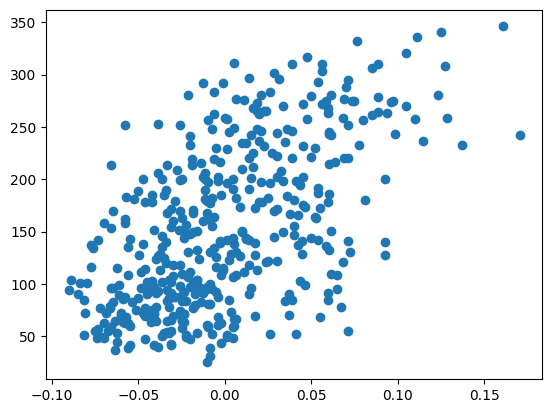

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

 Now that you have data ready to be plotted, you can see if a machine can help determine a logical split between the numbers in this dataset. To do this, you need to split both the data (X) and the target (y) into test and training sets. Scikit-learn has a straightforward way to do this; you can split your test data at a given point.

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

Now you are ready to train your model! Load up the linear regression model and train it with your X and y training sets using `model.fit()`:

In [19]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

✅ `model.fit()` is a function you'll see in many ML libraries such as TensorFlow

Then, create a prediction using test data, using the function `predict()`. This will be used to draw the line between data groups

In [20]:
y_pred = model.predict(X_test)

Now it's time to show the data in a plot. Matplotlib is a very useful tool for this task. Create a scatterplot of all the X and y test data, and use the prediction to draw a line in the most appropriate place, between the model's data groupings.

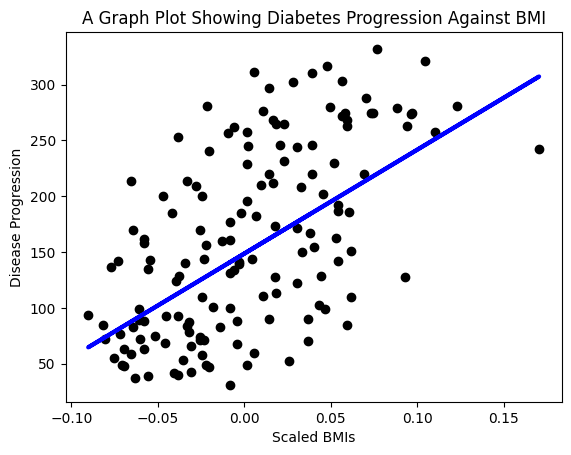

In [21]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')
plt.show()


✅ Think a bit about what's going on here. A straight line is running through many small dots of data, but what is it doing exactly? Can you see how you should be able to use this line to predict where a new, unseen data point should fit in relationship to the plot's y axis? Try to put into words the practical use of this model.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('Salary_Data.csv')
X = df.iloc[:, 0]
y = df.iloc[:, 1]
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3.0, random_state=0)
# you ought to do this when there is only a single feature. This is because the API expects 2D array. 
X_train = X_train.values.reshape(-1, 1)

## Simple Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

In [ ]:
y_pred

array([  40835.10590871,  123079.39940819,   65134.55626083,
         63265.36777221,  115602.64545369,  108125.8914992 ,
        116537.23969801,   64199.96201652,   76349.68719258,
        100649.1375447 ])

In [ ]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
17     83088.0
22    101302.0
Name: Salary, dtype: float64

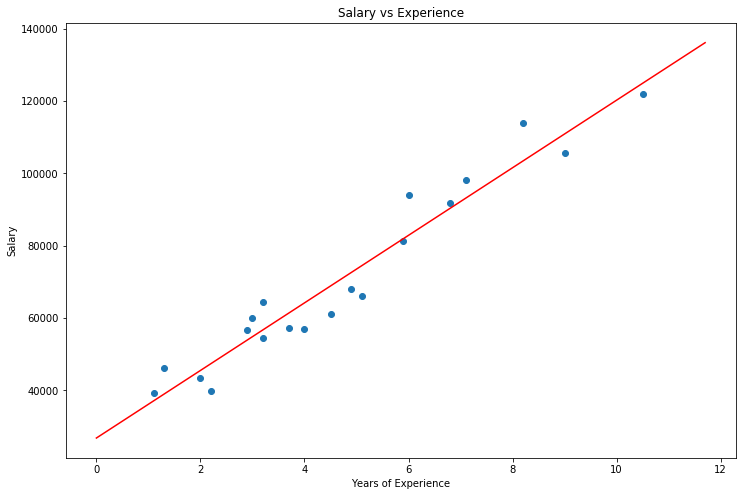

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(np.arange(0, 12, 0.3), regressor.predict(np.arange(0, 12, 0.3).reshape(-1, 1)), color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Fitting model

#### P value: 
P value helps to determine the significance of the result and is used in Hypothesis testing. The hypothesis under testing is called Null Hypothesis. The lower the P value, the better the model. In short, p value tells the scope of the error, eg. if the P value is 0.02 then there is 2% chances that the claims made might not hold true. Typically, the limit of P value is set to 5%

### Backward Elimination

1. Set Signifance level. Say, SL = 0.05
2. Fit model with all possible predictors. 
3. Check the highest P values, if any one of them is greater than SL then, remove the variable and rebuild model.
4. Repeat until no P value is greater than SL. 

### Forward Elimination
1. Set Significance level. Say, SL = 0.05
2. Make a model for every variable, choose one whose addition gives highest significance level. 
3. Repeat until no additional variable additional is significant. 

### Bidirectional Elimination
1. Set Signifiance level of entering and staying. SLEnter = 0.05, SLStay = 0.05
2. Perform one step of forward elimination. New variables must have P < SLEnter
3. Perform all step of backward elimination. Variables should have P < SLStay to stay.
4. Repeat till equilibrium.

### All Possible model
1. Select criterion of fitness (eg. Akaine criterion) 
2. Create one tree for every possible $2^n - 1$ combinations
3. Select one with best p 


## Multiple Linear Regression

In [ ]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X = df.iloc[:, :-1]
y = df['Profit']

In [ ]:
# one hot encode "State" column
X = pd.get_dummies(X, columns=['State'])


In [ ]:
# Avoid dummy variable trap, remove last column
X = X.iloc[:, :-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
0,165349.20,136897.80,471784.10,0.0,0.0
1,162597.70,151377.59,443898.53,1.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0
3,144372.41,118671.85,383199.62,0.0,0.0
4,142107.34,91391.77,366168.42,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
print y_pred
print y_test

[ 101818.58738692  135528.6007816   135664.64259063   74956.31104908
  182276.18673284  114279.80403011   69606.52160903   97617.29632021
  114833.30513844  172277.13381667]
28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64
